In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

df_CO2 = pd.read_excel("Food Research 2022.08.28.xlsx")

In [9]:
df_CO2['Type of Food']
beef_footprint= df_CO2[df_CO2['Type of Food']=='Beef']['Updated CO2 Emission'].values[0]
chick_footprint= df_CO2[df_CO2['Type of Food']=='Poultry']['Updated CO2 Emission'].values[0]
vege_footprint= df_CO2[df_CO2['Type of Food']=='Total Vegetables']['Updated CO2 Emission'].values[0]
print (beef_footprint, chick_footprint, vege_footprint)

df_CO2['Type of Food']

99.48 9.87 0.53


0                 Beef
1                 Pork
2              Poultry
3                 Lamb
4                 Fish
5               Shrimp
6               Cheese
7                 Eggs
8                 Milk
9                Wheat
10        Total Fruits
11    Total Vegetables
12            Tomatoes
13                Peas
14            Potatoes
15              Onions
16             Berries
17             Bananas
18        Citrus Fruit
19              Apples
20              Coffee
Name: Type of Food, dtype: object

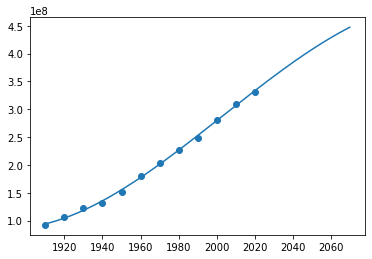

Year: 1910.0 Population: 94104186
Year: 1911.0 Population: 94974311
Year: 1912.0 Population: 95883622
Year: 1913.0 Population: 96831693
Year: 1914.0 Population: 97818100
Year: 1915.0 Population: 98842418
Year: 1916.0 Population: 99904223
Year: 1917.0 Population: 101003090
Year: 1918.0 Population: 102138595
Year: 1919.0 Population: 103310312
Year: 1920.0 Population: 104517818
Year: 1921.0 Population: 105760687
Year: 1922.0 Population: 107038495
Year: 1923.0 Population: 108350818
Year: 1924.0 Population: 109697230
Year: 1925.0 Population: 111077307
Year: 1926.0 Population: 112490624
Year: 1927.0 Population: 113936757
Year: 1928.0 Population: 115415281
Year: 1929.0 Population: 116925772
Year: 1930.0 Population: 118467804
Year: 1931.0 Population: 120040954
Year: 1932.0 Population: 121644796
Year: 1933.0 Population: 123278905
Year: 1934.0 Population: 124942858
Year: 1935.0 Population: 126636230
Year: 1936.0 Population: 128358596
Year: 1937.0 Population: 130109530
Year: 1938.0 Population: 13

In [3]:
# Trend over time (+population + time)
df_pop = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "4. Population")
df_popX = df_pop['Year']
df_popY = df_pop['Population']
df_popY = df_popY.dropna()
df_popX = df_popX.dropna()
df_popgraph = numpy.poly1d(numpy.polyfit(df_popX, df_popY,3))

df_popline = numpy.linspace(1910, 2070, 161)
plt.scatter(df_popX, df_popY)
plt.plot(df_popline, df_popgraph(df_popline))
plt.show()
df_show = df_popgraph(df_popline)
for i in range(0, len(df_show)):
  print("Year:", df_popline[i], "Population:", round(df_show[i]))


In [4]:
df_show2=numpy.array([round(x) for x in df_show])
#df3= pd.DataFrame(df_show2)
#filepath="population.xlsx"
#df3.to_excel(filepath,index=False)
df_show2

array([ 94104186,  94974311,  95883622,  96831693,  97818100,  98842418,
        99904223, 101003090, 102138595, 103310312, 104517818, 105760687,
       107038495, 108350818, 109697230, 111077307, 112490624, 113936757,
       115415281, 116925772, 118467804, 120040954, 121644796, 123278905,
       124942858, 126636230, 128358596, 130109530, 131888610, 133695410,
       135529505, 137390470, 139277882, 141191315, 143130345, 145094548,
       147083498, 149096770, 151133941, 153194586, 155278280, 157384598,
       159513115, 161663408, 163835051, 166027620, 168240690, 170473837,
       172726636, 174998661, 177289490, 179598696, 181925856, 184270544,
       186632336, 189010808, 191405535, 193816091, 196242053, 198682996,
       201138495, 203608126, 206091463, 208588083, 211097561, 213619471,
       216153390, 218698893, 221255554, 223822950, 226400656, 228988247,
       231585299, 234191386, 236806085, 239428970, 242059617, 244697602,
       247342499, 249993884, 252651333, 255314420, 

(49,) (49,)


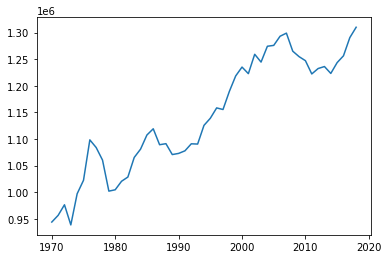

In [5]:
df_consumption = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "3. Food Consumption")
beef_2019= df_consumption.loc[(df_consumption['Year']==2019) & (df_consumption['Tab name']=='Beef')]['Consumer Weight in kg'].values[0]
vege_2019= df_consumption.loc[(df_consumption['Year']==2018) & (df_consumption['Tab name']=='Total Vegetables')]['Consumer Weight in kg'].values[0]

# print(beef_2019, vege_2019)

# calculate how many millions of tons of CO2 can be produced by food consumption
total_emission = 0
emission_per_year=numpy.arange(1970,2019)
df_yearline = numpy.linspace(1970, 2018,49)
for i in range(1970, 2019):
    emission_per_year[i-1970] = 0
    for t in df_CO2['Type of Food']:
        #print(t)
        food_consumped_this_year = df_consumption.loc[(df_consumption['Year']==i) & (df_consumption['Tab name']==t)]['Consumer Weight in kg'].values[0]
        footprint= df_CO2[df_CO2['Type of Food']==t]['Updated CO2 Emission'].values[0]
        #print(i,t, food_consumped_this_year, food_consumped_this_year*footprint)
        food_emission = food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
        emission_per_year[i-1970] = emission_per_year[i-1970] + food_emission
    #print(i, df_yearline[i-1970], emission_per_year[i-1970])

print( df_yearline.shape, emission_per_year.shape )
plt.plot(df_yearline, emission_per_year)
plt.show()

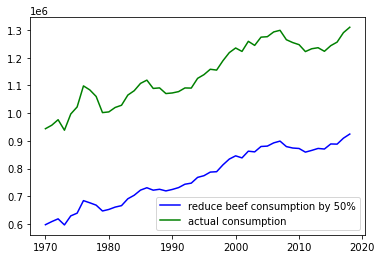

In [6]:
sum1 = 0
sum2 = 0
sum_veg = 0
emission_new=numpy.arange(1970,2019)
emission_chicken = numpy.arange(1970,2019)
for i in range(1970, 2019):
    emission_new[i-1970] = 0
    emission_chicken[i-1970] = 0
    pop = df_show2[i-1910]
    #print (df_show2[i-1910])
    for t in df_CO2['Type of Food']:
        food_consumped_this_year = df_consumption.loc[(df_consumption['Year']==i) & (df_consumption['Tab name']==t)]['Consumer Weight in kg'].values[0]
        footprint= df_CO2[df_CO2['Type of Food']==t]['Updated CO2 Emission'].values[0]
        if t == 'Beef':
            # sum1 = sum1 + beef_2019*pop*beef_footprint
             sum2 = sum2 + 0.5*food_consumped_this_year*beef_footprint + 0.5*food_consumped_this_year*pop*chick_footprint
            # sum_veg = sum_veg + 0.5*beef_2019*pop*beef_footprint + 0.5*vege_2019*pop*vege_footprint
             food_emission = 0.5*food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
             food_emiss_chicken = 0.5*food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
        else:
             food_emission = food_consumped_this_year*footprint*round(df_show2[i-1910])/1000000
        emission_new[i-1970] = emission_new[i-1970] + food_emission

plt.plot(df_yearline, emission_new, color="blue", label='reduce beef consumption by 50%')
plt.plot(df_yearline, emission_per_year, color="green", label='actual consumption')
plt.legend()
plt.show()

#print ((sum1-sum2)/1000,(sum1-sum_veg)/1000)
#print((sum1-sum2)/sum1)
#print((sum1-sum_veg)/sum1)

In [7]:
sum3 = 0
sum4 = 0
for i in range(2020, 2050):
    pop = df_show2[i-1910]
    #print (df_show2[i-1910])
    sum3 = sum3 + beef_2019*pop*beef_footprint
    sum4 = sum4 + 0.5*beef_2019*pop*beef_footprint + 0.5*beef_2019*pop*chick_footprint
print(sum3)
print(sum4)
print((sum3-sum4)/sum3)

26436443380709.027
14529679753118.885
0.4503920386007235


In [8]:
# A typical passenger vehicle emits about 4.6 metric tons of carbon dioxide per year.
print(beef_2019*beef_footprint)
print(0.5*beef_2019*beef_footprint-0.5*beef_2019*chick_footprint)
# A typical tree can absorb around 21 kilograms of carbon dioxide (CO2) per year

2382.3939515052307
1073.0112685684746


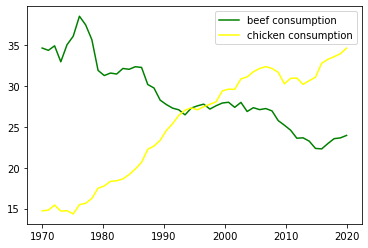

[24.06957487 24.18783445 24.30331709 24.41608799 24.52621083 24.63374779
 24.73875959 24.84130553 24.94144351 25.03923007 25.13472043 25.22796851
 25.31902696 25.40794719 25.49477942 25.57957267 25.66237483 25.74323264
 25.82219177 25.8992968  25.97459127 26.04811769 26.11991758 26.19003148
 26.25849898 26.32535875 26.39064853 26.45440518 26.51666472 26.5774623 ]
[34.6294798  34.34707087 34.90070692 32.94848574 35.0294369  36.07372129
 38.51526256 37.45935447 35.65131485 31.89520069 31.26481955 31.57109554
 31.45287082 32.13252392 32.0309361  32.34456174 32.25950583 30.17095331
 29.74500274 28.26009987 27.71848057 27.28276227 27.07814796 26.46225177
 27.28884036 27.56238074 27.77136231 27.16930955 27.57413353 27.90794178
 28.00210903 27.38148184 27.98585021 26.87213052 27.33741434 27.1017582
 27.23131254 26.94819346 25.76039601 25.1960159  24.58571776 23.60585022
 23.65657529 23.24334348 22.35987272 22.30173718 22.95666308 23.55086575
 23.64411053 23.94847157 24.06957487 24.18783445 24

In [9]:
import statsmodels.api as sm

# Food Consumption Prediction
df_consumption = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "3. Food Consumption")
# 1970 - 2019
beefs = df_consumption.loc[df_consumption['Tab name']=='Beef']['Consumer Weight in kg']
poultries = df_consumption.loc[df_consumption['Tab name']=='Poultry']['Consumer Weight in kg']
beef_list = beefs.to_numpy()
chicken_list = poultries.to_numpy()
# plot the eating habit change from 1970 to 2020
yearline = numpy.linspace(1970, 2020,50)
plt.plot(yearline, beef_list, color="green", label='beef consumption')
plt.plot(yearline, chicken_list, color="yellow", label='chicken consumption')
plt.legend()
plt.show()

mod = sm.tsa.SARIMAX(beef_list, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

# forcast the beef consumption in the next 20 years
print(res.forecast(steps=30))

future = res.forecast(steps=30)
beef_long_list = numpy.concatenate((beef_list, future), axis=None)
print(beef_long_list)

C:\Users\wwj\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\wwj\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


[52.71340277 52.62372544 52.5372307  52.45380561 52.37334122 52.29573247
 52.22087801 52.14868009 52.07904443 52.01188009 51.94709938 51.8846177
 51.82435346 51.76622796 51.7101653  51.65609227 51.60393826 51.55363517
 51.5051173  51.4583213  51.41318607 51.36965265 51.32766422 51.28716592
 51.24810489 51.21043011 51.17409239 51.13904427 51.10523999 51.0726354 ]
[77.03739307 77.73887347 78.43418086 79.12336954 79.80649337 80.48360572
 81.15475949 81.82000711 82.47940055 83.13299134 83.78083054 84.42296876
 85.05945617 85.6903425  86.31567703 86.93550863 87.54988572 88.15885629
 88.76246792 89.36076778 89.95380261 90.54161874 91.12426209 91.70177818
 92.27421214 92.84160869 93.40401215 93.96146647 94.51401519 95.06170149]
[76.35800296 75.73529127 76.95605876 72.65141107 77.23990836 79.54255544
 84.92615394 82.5978766  78.61114923 70.32891752 68.93892712 69.61426566
 69.35358016 70.85221524 70.6282141  71.31975863 71.13221035 66.52695205
 65.58773104 62.31352022 61.11924965 60.15849081 5

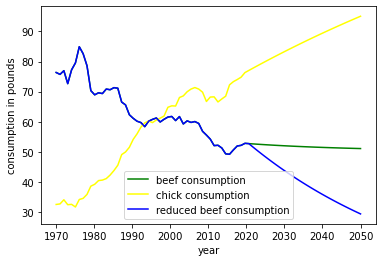

In [5]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
def forcast_30_years(data):
    # fit model for beef
    model = AutoReg(data, lags=1)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    yhat_list = model_fit.forecast(steps=30)
    print(yhat_list)
    long_list = numpy.concatenate((data, yhat_list), axis=None)
    return long_list

# fit mode 
x = numpy.linspace(1970, 2050,80)
beef_long_list = forcast_30_years(beef_list)
chicken_long_list = forcast_30_years(chicken_list)

# construct a beef_long_list where the beef consumption is reduced by 50%
new_beef_list = numpy.zeros(80)
for i in range(0,80):
    if i < 50:
        new_beef_list[i]=beef_long_list[i]
    else:
        new_beef_list[i]=beef_long_list[50]*pow(0.98,i-50)
plt.plot(x, beef_long_list, color="green",label='beef consumption')
plt.plot(x, chicken_long_list, color="yellow", label='chick consumption')
plt.plot(x, new_beef_list, color="blue", label='reduced beef consumption')
print(new_beef_list)

plt.legend()
plt.xlabel('year')
plt.ylabel('consumption in pounds')
plt.show()


In [25]:
# calculate reduced carbone emission
# diet change: beef_long_list, new_beef_list chicken_long_list
# population change: df_show
df_show2=numpy.array([round(x) for x in df_show])
# carbon emission 
old_sum = 0
new_sum = 0
chick_2020 = chicken_long_list[2020-1970]
for i in range(2020, 2050):
     pop = df_show2[i-1910]
     beef_consumed = beef_long_list[i-1970]
     reduce_beef = new_beef_list[i-1970]
     chick_consumed = chicken_long_list[i-1970]
     old_sum = old_sum + beef_footprint*beef_consumed*pop + chick_footprint*chick_2020*pop
     new_sum = new_sum + beef_footprint*reduce_beef*pop + chick_footprint*chick_consumed*pop

print('estimated CO2 emission caused by beef consumption over the next 30 years %d million tons' % (old_sum/1000000000))
print('estimated CO2 emission that we can be acheive by gradually replacing beef with chicken in the next 30 years %d million tons' % (new_sum/1000000000))
print((old_sum - new_sum)/1000000000)

# in one year a mature tree will absorb more than 48 pounds of carbon dioxide from the atmosphere and release oxygen in exchange
# A tree absorbs approximately 25kg of CO2 per year
t=(old_sum - new_sum)/pop
print('this amount of CO2 emission reduction would be quivalent to planting %d trees ' % (t/(25*30) ))

estimated CO2 emission caused by beef consumption over the next 30 years 29723 million tons
estimated CO2 emission that we can be acheive by gradually replacing beef with chicken in the next 30 years 24097 million tons
5626.553031310828
this amount of CO2 emission reduction would be quivalent to planting 18 trees 


C:\Users\wwj\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\wwj\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


[52.71340277 52.62372544 52.5372307  52.45380561 52.37334122 52.29573247
 52.22087801 52.14868009 52.07904443 52.01188009 51.94709938 51.8846177
 51.82435346 51.76622796 51.7101653  51.65609227 51.60393826 51.55363517
 51.5051173  51.4583213  51.41318607 51.36965265 51.32766422 51.28716592
 51.24810489 51.21043011 51.17409239 51.13904427 51.10523999 51.0726354 ]
[77.03739307 77.73887347 78.43418086 79.12336954 79.80649337 80.48360572
 81.15475949 81.82000711 82.47940055 83.13299134 83.78083054 84.42296876
 85.05945617 85.6903425  86.31567703 86.93550863 87.54988572 88.15885629
 88.76246792 89.36076778 89.95380261 90.54161874 91.12426209 91.70177818
 92.27421214 92.84160869 93.40401215 93.96146647 94.51401519 95.06170149]
[76.35800296 75.73529127 76.95605876 72.65141107 77.23990836 79.54255544
 84.92615394 82.5978766  78.61114923 70.32891752 68.93892712 69.61426566
 69.35358016 70.85221524 70.6282141  71.31975863 71.13221035 66.52695205
 65.58773104 62.31352022 61.11924965 60.15849081 5

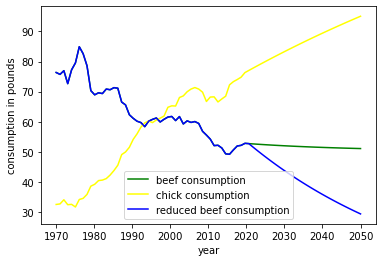

In [6]:
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
from random import random
import statsmodels.api as sm

# contrived dataset
def forcast_30_years(data):
    # fit model for beef
    model = AutoReg(data, lags=1)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    yhat_list = model_fit.forecast(steps=30)
    print(yhat_list)
    long_list = numpy.concatenate((data, yhat_list), axis=None)
    return long_list

# read beef and chicken consumption in pounds

df_consumption = pd.read_excel("Food Research 2022.08.28.xlsx", sheet_name = "3. Food Consumption")
# 1970 - 2019
beefs = df_consumption.loc[df_consumption['Tab name']=='Beef']['Consumer Weight in Pounds']
poultries = df_consumption.loc[df_consumption['Tab name']=='Poultry']['Consumer Weight in Pounds']
beef_list = beefs.to_numpy()
chicken_list = poultries.to_numpy()
# fit mode 
x = numpy.linspace(1970, 2050,80)
beef_long_list = forcast_30_years(beef_list)
chicken_long_list = forcast_30_years(chicken_list)

# construct a beef_long_list where the beef consumption is reduced by 50%
new_beef_list = numpy.zeros(80)
for i in range(0,80):
    if i < 50:
        new_beef_list[i]=beef_long_list[i]
    else:
        new_beef_list[i]=beef_long_list[50]*pow(0.98,i-50)
plt.plot(x, beef_long_list, color="green",label='beef consumption')
plt.plot(x, chicken_long_list, color="yellow", label='chick consumption')
plt.plot(x, new_beef_list, color="blue", label='reduced beef consumption')
print(new_beef_list)

plt.legend()
plt.xlabel('year')
plt.ylabel('consumption in pounds')
plt.show()

[32.48570916 32.66604407 34.04372831 32.40281636 32.52344672 31.65010853
 34.13543896 34.5150653  35.81926988 38.57122835 39.19387847 40.42645896
 40.5863846  41.07883061 42.26001104 43.76091527 45.5302211  49.05951753
 49.9385441  51.49492271 54.13647133 55.96686218 58.21080755 59.60663893
 60.23608312 59.70230705 60.54243058 61.19004471 61.86674295 64.79489318
 65.27422667 65.20680532 68.04369752 68.58089017 69.95765955 70.84834032
 71.35624091 70.85059579 69.80602764 66.71723054 68.19472808 68.26650604
 66.56718945 67.56934092 68.48879852 72.26244835 73.31912825 74.0207395
 74.80510882 76.32968484 77.03739307 77.73887347 78.43418086 79.12336954
 79.80649337 80.48360572 81.15475949 81.82000711 82.47940055 83.13299134
 83.78083054 84.42296876 85.05945617 85.6903425  86.31567703 86.93550863
 87.54988572 88.15885629 88.76246792 89.36076778 89.95380261 90.54161874
 91.12426209 91.70177818 92.27421214 92.84160869 93.40401215 93.96146647
 94.51401519 95.06170149]
[3591 3563 3624 3423 3630 

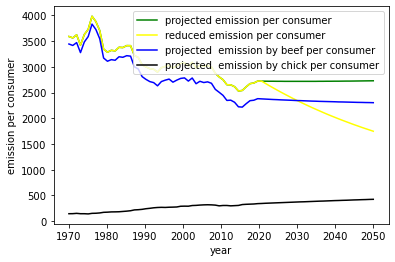

In [15]:

# carbon emission 
old_sum = 0
new_sum = 0
chick_2020 = chicken_long_list[2020-1970]
emission_list = numpy.arange(1970,2050)
new_emission_list = numpy.arange(1970,2050)
beef_emission_list = numpy.arange(1970,2050)
chick_emission_list = numpy.arange(1970,2050)
poundtokg = 0.4536
for i in range(1970, 2050):
     beef_consumed = beef_long_list[i-1970]
     reduce_beef = new_beef_list[i-1970]
     chick_consumed = chicken_long_list[i-1970]
     emission_list[i-1970] =  (beef_footprint*beef_consumed + chick_footprint*chick_consumed)*poundtokg;
     new_emission_list[i-1970] = (beef_footprint*reduce_beef + chick_footprint*chick_consumed)*poundtokg;
     beef_emission_list[i-1970] = beef_footprint*beef_consumed*poundtokg;
     chick_emission_list[i-1970] = chick_footprint*chick_consumed*poundtokg
    

plt.plot(x, emission_list, color="green",label='projected emission per consumer')
plt.plot(x, new_emission_list, color="yellow", label='reduced emission per consumer')
plt.plot(x, beef_emission_list, color="blue", label='projected  emission by beef per consumer')
plt.plot(x, chick_emission_list, color="black", label='projected  emission by chick per consumer')

print(chicken_long_list)
print(emission_list)
print(new_emission_list)

plt.legend()
plt.xlabel('year')
plt.ylabel('emission per consumer')
plt.show()